# **NPV Mini Project**

**A Company is having its offices across all locations of India. These locations are categorized with respect to zones.  The company has decided to give medical expenditure benefits to their employees.  The company has collected the medical expenditure of all the employees for the year 2019.  The company also collected some other health and family related data of all employees like number of dependents, age, bmi, smoking and alcoholic habits.**

Answer the following questions to provide insight into the collected dat.

Dataset details -->

id: Employee id - unique

age: age of primary beneficiary

sex: Gender data - female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

dependent: Number of children other family members who are not earning and dependent on employee.

alcohol: Alcohol consumption habit. Possible values - daily, weekend, party, no, rarely

smoker: Smoking habit.

zone: The office location zones. Possible values - east, west, south, north, northeast, southeast, southwest, northwest.

expenditure: Individual medical expenditure by employees during year 2019

Read the dataset and do primary study of data. Perform following steps:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
emp_health = pd.read_csv('emp_health.csv')

### **a. Reading some rows of dataset**

In [79]:
emp_health.head()

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure,category
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400,overweight
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230,overweight
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200,overweight
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061,fit
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520,overweight


### **b. Learn data types of all features**

In [4]:
emp_health.dtypes

id              object
age              int64
sex             object
bmi            float64
dependent        int64
alcohol         object
smoke           object
zone            object
expenditure    float64
dtype: object

### **c. See the statistical properties of the data**

In [5]:
emp_health.describe()

,age,bmi,dependent,expenditure
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **1. How many employees above 50 age smoke, what is their average expenditure on health management?**

In [6]:
emp_above50_smoke = emp_health[(emp_health.age >50) & (emp_health.smoke == 'yes')]
emp_above50_smoke

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
11,i10023,62,female,26.290,0,daily,yes,south,27808.72510
39,i10051,60,male,39.900,0,daily,yes,southwest,48173.36100
55,i10067,58,male,36.955,2,weekend,yes,northwest,47496.49445
58,i10070,53,female,22.880,1,daily,yes,south,23244.79020
86,i10098,57,female,31.160,0,no,yes,northwest,43578.93940
...,...,...,...,...,...,...,...,...,...
1265,i11277,64,male,23.760,0,weekend,yes,southeast,26926.51440
1284,i11296,61,male,36.300,1,daily,yes,southwest,47403.88000
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1321,i11333,62,male,26.695,0,daily,yes,east,28101.33305


In [7]:
emp_above50_smoke.id.count()

64

In [8]:
emp_above50_smoke.expenditure.mean()

38820.22308234375

**There are total 64 employees who are above age 50 and also smoke and their average expenditure on health management is 38820.2230**

# **2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?**

In [9]:
emp_female_nondalc = emp_health[(emp_health.sex == 'female') & (emp_health.alcohol != 'daily')]
emp_female_nondalc.id.count()

453

In [10]:
emp_female = emp_health[emp_health.sex == 'female']
emp_female.id.count()

662

In [11]:
proportion = (emp_female_nondalc.id.count()) / (emp_female.id.count())
proportion

0.6842900302114804

**Total 453 female employees did not consume alcohol daily and their proportion with respect to total female employees is 0.68429**

# **3. Display zone wise average expenditure of employees on health**

In [12]:
emp_health.groupby('zone')['expenditure'].mean()

zone
east         13774.679941
north        14102.583403
northeast    13694.721724
northwest    12151.702619
south        14715.689519
southeast    14452.949680
southwest    12717.083869
west         12182.998872
Name: expenditure, dtype: float64

# **4. Employees of which zone did maximum expenditure on health**

In [13]:
emp_health_exp = emp_health.groupby('zone')['expenditure'].sum()
emp_health_exp[(emp_health_exp == max(emp_health_exp))]

zone
east    3.608966e+06
Name: expenditure, dtype: float64

**Employees of east zone did maximum expenditure on health**

# **5. What is the minimum expenditure done by any employee in organization**

In [14]:
emp_health.expenditure.min()

1121.8739

**The minimum expenditure done by any employee in organization is 1121.8739**

# **6. What is average expenditure of employees who have 2 or lesser dependents**

In [15]:
emp_health[emp_health.dependent <= 2]['expenditure'].mean()

13040.970970948145

**Average expenditure of employees who have 2 or lesser dependents is 13040.97097**

# **7. How many employees are below age of 20 years. What is their average BMI**

In [16]:
emp_health[emp_health.age < 20].id.count()

137

In [17]:
emp_health[emp_health.age < 20].bmi.mean()

29.971496350364966

**Total 137 employees are below age of 20 years and their average BMI is 29.97149**

# **8. Create a dataframe "non_smoker" for all non-smoker male employees**

In [18]:
non_smoker = emp_health[(emp_health.sex == 'male') & (emp_health.smoke == 'no')]
non_smoker

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


# **9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol**

In [19]:
non_alcoholic = emp_health[(emp_health.sex == 'male') & (emp_health.alcohol == 'no')]
non_alcoholic

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630
...,...,...,...,...,...,...,...,...,...
1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65400
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


# **10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol**

In [20]:
non_smoking_alcoholic = non_smoker.join(non_alcoholic, rsuffix = '_alcohol', how='inner').filter(items=['id','smoke','alcohol']).reset_index()
non_smoking_alcoholic

,index,id,smoke,alcohol
0,18,i10030,no,no
1,24,i10036,no,no
2,28,i10040,no,no
3,37,i10049,no,no
4,67,i10079,no,no
...,...,...,...,...
104,1261,i11273,no,no
105,1270,i11282,no,no
106,1310,i11322,no,no
107,1320,i11332,no,no


# 11.What is the count for each zone with respect to number of dependent

In [21]:
pd.pivot_table(emp_health, index=emp_health.dependent, columns='zone', values='dependent', aggfunc='count')
#emp_health.groupby(['zone','dependent'])['zone'].count()

zone,east,north,northeast,northwest,south,southeast,southwest,west
dependent,,,,,,,,
0,124.0,26.0,35.0,70.0,38.0,81.0,116.0,84.0
1,65.0,20.0,9.0,28.0,21.0,57.0,53.0,71.0
2,42.0,10.0,15.0,30.0,12.0,38.0,44.0,49.0
3,22.0,12.0,13.0,13.0,12.0,15.0,25.0,45.0
4,6.0,1.0,2.0,4.0,1.0,2.0,6.0,3.0
5,3.0,1.0,NaN,NaN,NaN,5.0,7.0,2.0


**Count of each zone with respect to number of dependent is as displayed above.**

# 12. Classify the employees into 3 categories.
**Category 1 : employees below 18.5 bmi - underweight**
**Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit**
**Category 3 : employee with bmi over 24.9 - overweight**
**What is the average expenditure of employees in each category.**
**Display the bar chart for the same**

In [22]:
conditions = [(emp_health['bmi'] <18.5),(emp_health['bmi'] >= 18.5) & (emp_health['bmi'] <= 24.9), (emp_health['bmi'] >24.9)]
values = ['underweight','fit','overweight']
emp_health['category'] = np.select(conditions, values) 
#Created a new column with categories given and assigned them as per the BMI value
emp_health

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure,category
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400,overweight
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230,overweight
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200,overweight
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061,fit
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520,overweight
...,...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830,overweight
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080,overweight
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350,overweight
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500,overweight


In [23]:
print('Average expenditure of employees in each category :')
emp_health.groupby('category')['expenditure'].mean()

Average expenditure of employees in each category :


category
fit            10379.499732
overweight     13936.616823
underweight     8852.200585
Name: expenditure, dtype: float64

Average expenditure according to category :


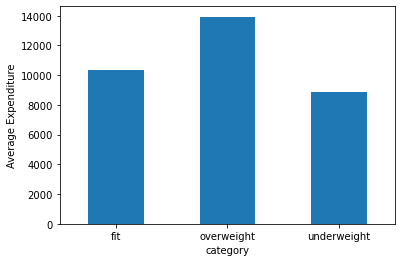

In [24]:
print('Average expenditure according to category :')
emp_health.groupby('category')['expenditure'].mean().plot(kind='bar', rot=0, ylabel='Average Expenditure')
plt.show()

# 13. Draw line plot of expenditure against age and BMI

Line plot of expenditure against age and BMI :


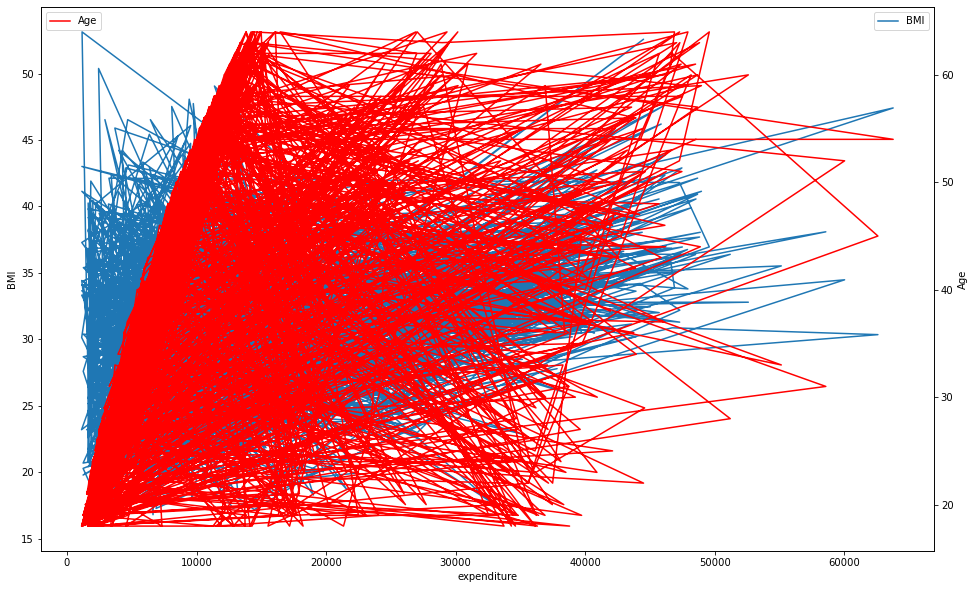

In [36]:
print('Line plot of expenditure against age and BMI :')
fig, xy1 = plt.subplots(figsize=(16,10))
xy1.set_xlabel('expenditure')
xy1.set_ylabel('BMI')
xy1.plot(emp_health.expenditure, emp_health.bmi, label='BMI')
plt.legend()
xy2 = xy1.twinx()
xy2.set_ylabel('Age')  
xy2.plot(emp_health.expenditure, emp_health.age, color='red', label='Age')
plt.legend(loc = 'upper left')
plt.show()

# 14. Draw a bar chart to show zone wise average expenditure

Bar plot of zone wise average expenditure :


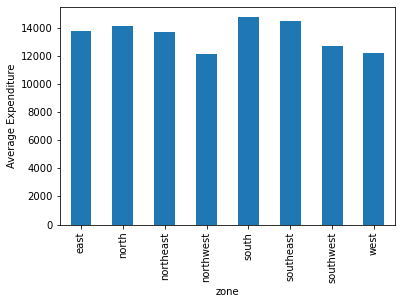

In [27]:
print('Bar plot of zone wise average expenditure :')
emp_health.groupby('zone')['expenditure'].mean().plot(kind='bar', rot=90, ylabel='Average Expenditure')
plt.show()

# 15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

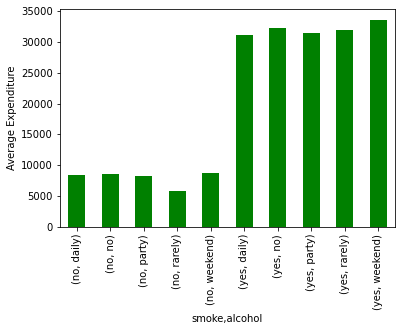

In [89]:
emp_health.groupby(['smoke','alcohol'])['expenditure'].mean().plot(kind='bar', ylabel='Average Expenditure', color='g')
plt.show()

# 16. Draw pie chart for alcohol consumption habits

Pie chart for alcohol consumption habits :


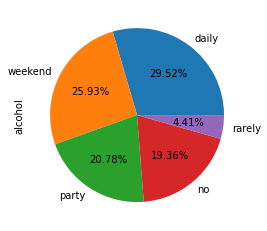

In [62]:
print('Pie chart for alcohol consumption habits :')
emp_health.alcohol.value_counts().plot(kind='pie', autopct='%0.2f%%')
plt.show()

# 17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

Scatterplot between age and expenditure :


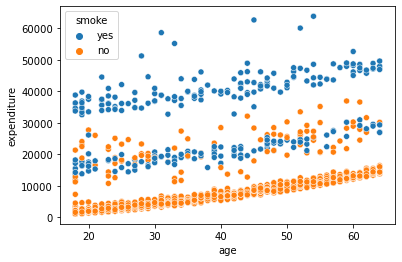

In [71]:
print('Scatterplot between age and expenditure :')
sns.scatterplot(data = emp_health, x='age', y='expenditure', hue='smoke')
plt.show()

# 18. Draw distribution plot of expenditure

Distribution plot of expenditure :


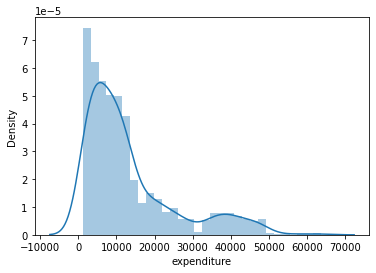

In [72]:
print('Distribution plot of expenditure :')
sns.distplot(emp_health.expenditure)
plt.show()

# 19. Display the pairplot

Pairplot of dataframe :


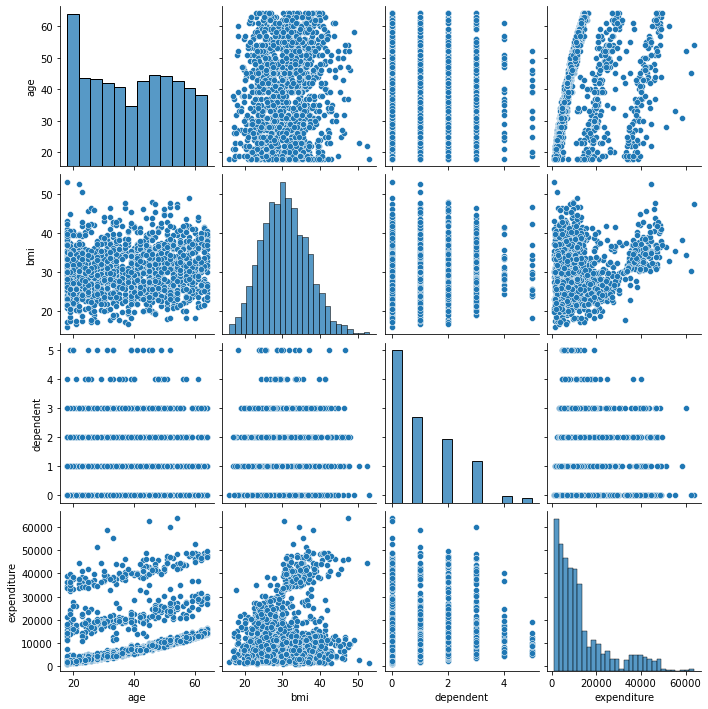

In [73]:
print('Pairplot of dataframe :')
sns.pairplot(emp_health)
plt.show()

# 20. Display heatmap for the data

Heatmap of numeric data :


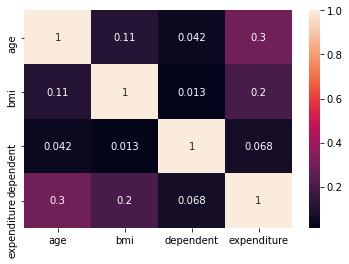

In [77]:
print('Heatmap of numeric data :')
emp_num = emp_health[['age','bmi','dependent','expenditure']]
corr_mat = emp_num.corr()
sns.heatmap(corr_mat, annot=True)
plt.show()